# Property Database for Common Substances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chemicals import acentric, critical, heat_capacity
from phasepy import component, mixture, preos

CASRN={'water':'7732-18-5',
      'ethanol':'64-17-5'}

# Define Critical Properties of Substance

We can do this using a python database [chemicals](https://chemicals.readthedocs.io/index.html) that looks up the critical properties using the [CAS RN](https://en.wikipedia.org/wiki/CAS_Registry_Number). These numbers are available for a large variety of substances


In [2]:
substance='water'
w = acentric.omega(CASRN=CASRN[substance])
Pc=critical.Pc(CASRN=CASRN[substance])##Pa
Tc=critical.Tc(CASRN=CASRN[substance])##K

# Equation of State

In [3]:
eos=preos(component(name=substance, Tc=Tc, Pc=Pc, w=w),'mhv_unifac')

# Heat Capacity for Ideal Gas

In [4]:
if(CASRN[substance] in heat_capacity.Cp_data_Poling['Chemical']):
    Cp=heat_capacity.Cp_data_Poling['Cpg'][CASRN[substance]]
    ##collect temperature dependent coefficients
    a_=[]
    for i in np.arange(5):
        a_.append(heat_capacity.Cp_data_Poling['a%g'%i][CASRN[substance]])
R=8.314##J/mol*K

# Set up T-S Property Diagram

22.04832
110.2416
220.4832
2204.832
22048.32


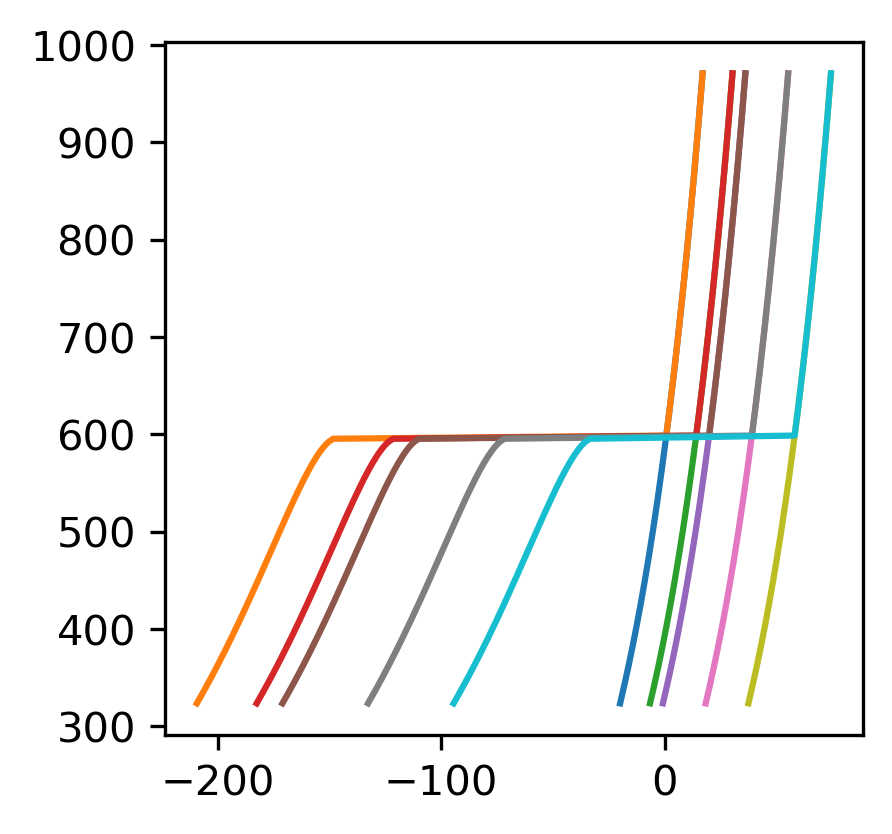

In [5]:
#eos.EnthalpyR?

T_=np.logspace(np.log10(0.5*Tc),np.log10(1.5*Tc),201)
P_=np.asarray([0.1,0.5,1,10,100])*Pc/10**5

SRl_=[]
SRv_=[]

plt.figure(dpi=300,figsize=(3,3))

Tr=600##K
Pr=20##bar

def dH_(T,P):
    
    def Cp_(T):
        
        return 
    
def SR_IG(T,P):
    return Cp*np.log(T/Tr)+R*np.log(P/Pr)

for P in P_:
    l1=[]
    l2=[]
    print(P)
    for T in T_:
        l1.append(eos.EntropyR(T,P,'V')[0]+SR_IG(T,P))
        l2.append(eos.EntropyR(T,P,'L')[0]+SR_IG(T,P))
    SRv_.append(l1)
    SRl_.append(l2)
    plt.plot(l1,T_)
    plt.plot(l2,T_)
